<a href="https://colab.research.google.com/github/bhavbhavyaa/Movie-Review-Classification-Tensorflow/blob/main/Movie_Review_Clasiification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import tensorflow as tf

In [84]:
tf.__version__

'2.5.0'

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from tensorflow.keras.models import load_model
%matplotlib inline

In [86]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [87]:
train_data, validation_data, test_data = tfds.load(name = "imdb_reviews",split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [88]:
train_examples_batch , train_labels_batch = next(iter(train_data.batch(20)))
train_examples_batch

<tf.Tensor: shape=(20,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [89]:
train_labels_batch

<tf.Tensor: shape=(20,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0])>

In [90]:
preprocessed = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(preprocessed,input_shape =[],dtype = tf.string, trainable = True)

In [91]:
hub_layer(train_examples_batch[:2])

<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ]],
      dtype=float32)>

In [92]:
train_examples_batch[:2]

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell a

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [94]:
model = Sequential()
model.add(hub_layer)
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [95]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(optimizer = 'rmsprop',metrics =['accuracy'],loss = 'binary_crossentropy')

In [97]:
training  = model.fit(train_data.shuffle(1000).batch(512),verbose = 1, epochs = 20, validation_data= validation_data.batch(512))

Epoch 1/20
30/30 [==============================] - 4s 108ms/step - loss: 0.6489 - accuracy: 0.6257 - val_loss: 0.6183 - val_accuracy: 0.6644
Epoch 2/20
30/30 [==============================] - 3s 112ms/step - loss: 0.5966 - accuracy: 0.6848 - val_loss: 0.5982 - val_accuracy: 0.6775
Epoch 3/20
30/30 [==============================] - 3s 113ms/step - loss: 0.5615 - accuracy: 0.7189 - val_loss: 0.5553 - val_accuracy: 0.7249
Epoch 4/20
30/30 [==============================] - 3s 114ms/step - loss: 0.5255 - accuracy: 0.7493 - val_loss: 0.5237 - val_accuracy: 0.7495
Epoch 5/20
30/30 [==============================] - 3s 111ms/step - loss: 0.4911 - accuracy: 0.7767 - val_loss: 0.4949 - val_accuracy: 0.7711
Epoch 6/20
30/30 [==============================] - 3s 108ms/step - loss: 0.4574 - accuracy: 0.7979 - val_loss: 0.4666 - val_accuracy: 0.7880
Epoch 7/20
30/30 [==============================] - 3s 112ms/step - loss: 0.4242 - accuracy: 0.8179 - val_loss: 0.4379 - val_accuracy: 0.8080
Epoch 

In [98]:
model.save('movie_model.h5')

In [100]:
#model = load_model('movie_model.h5')

Training Accuracy at first epoch:  0.6256666779518127
Trainig Accuracy at last epoch:  0.9304666519165039
Validation Accuracy at first epoch:  0.6643999814987183
Validation Accuracy at last epoch:  0.8712999820709229


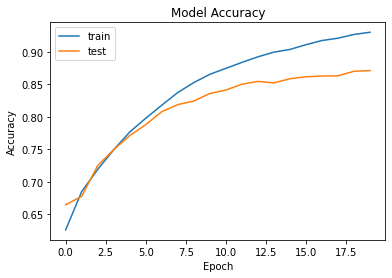

In [101]:
print("Training Accuracy at first epoch: ",training.history["accuracy"][0])
print("Trainig Accuracy at last epoch: ",training.history['accuracy'][19])
print("Validation Accuracy at first epoch: ",training.history["val_accuracy"][0])
print("Validation Accuracy at last epoch: ",training.history['val_accuracy'][19])
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

Training Loss at first epoch:  0.6489343047142029
Trainig Loss at last epoch:  0.19532091915607452
Validation Loss at first epoch:  0.6183094382286072
Validation Loss at last epoch:  0.31125661730766296


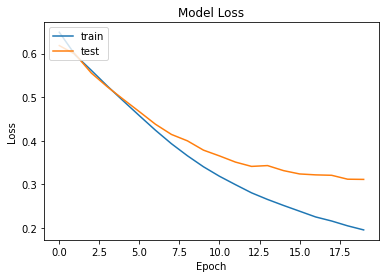

In [102]:
print("Training Loss at first epoch: ",training.history["loss"][0])
print("Trainig Loss at last epoch: ",training.history['loss'][19])
print("Validation Loss at first epoch: ",training.history["val_loss"][0])
print("Validation Loss at last epoch: ",training.history['val_loss'][19])
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

In [103]:
results = model.predict(test_data.batch(512), verbose=2)

49/49 - 3s


In [104]:
results

array([[0.3346784 ],
       [0.79819036],
       [0.14079177],
       ...,
       [0.00293961],
       [0.9734408 ],
       [0.98994684]], dtype=float32)

In [105]:
for i in range(6):
  if results[i] > 0.5:
    print("Positive Review")
  else:
    print("Negative Review")

Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review


In [106]:
prediction = model.predict(['I didnt like the movie but it was good'])
prediction

array([[0.6132138]], dtype=float32)

In [107]:
if prediction > 0.5:
  print("Positive Review")
else:
  print("Negative Review")  

Positive Review


In [108]:
eval = model.evaluate(test_data.batch(512), verbose=2)

49/49 - 3s - loss: 0.3176 - accuracy: 0.8628
